## Dependencies

In [1]:
# Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind

In [2]:
import numpy as np
import pandas as pd
from matplotlib import dates as mdates
import datetime as dt

In [3]:
from sqlalchemy import extract
from sqlalchemy import desc

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# Create engine to link database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn=engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Climate Analysis and Exploration

In [10]:
# # Alternative Solution to plot the data:
# #     Climate Analysis without following the given template
# df = pd.read_sql('SELECT date, prcp FROM measurement',conn )
# #df
# df=df.groupby("date").mean()["prcp"]
# df
# df=pd.DataFrame(df).reset_index()
# #df
# df=df.tail(365)
# df

In [11]:
# # Use Pandas Plotting with Matplotlib to plot the data
# df.plot(x="date", y="prcp", figsize=(18,8), title =("Honolulu, HI Precipitation - Year:2016-2017"))

# plt.show()


In [12]:
# # Design a query to calculate the total number of stations.
# station = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station)
# for row in station:
#     print(row)

## Precipitation Analysis

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_date = session.query(Measurement.date).order_by(desc(Measurement.date)).first()
result = [str(datestr) for datestr in last_date]
last_date_result = result[0]
last_date_result

'2017-08-23'

In [14]:
one_year_ago = dt.date(2017,8,23) - dt.timedelta(days = 365)
one_year_ago

datetime.date(2016, 8, 23)

In [15]:
# Calculate the date 1 year ago from the last data point in the database
precipitation_data = session.query(func.strftime("%Y-%m-%d", Measurement.date), Measurement.prcp)\
                            .filter(func.strftime("%Y-%m-%d", Measurement.date) >= dt.date(2016, 8, 23)).all()
precipitation_data

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [16]:
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame

precipitation_df = pd.DataFrame(precipitation_data, columns = ['date', 'precipitation'])
precipitation_df.head()

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [17]:
#  Set the index to the date column
precipitation_df.set_index('date', inplace = True)
precipitation_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [18]:
# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by = 'date')
precipitation_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


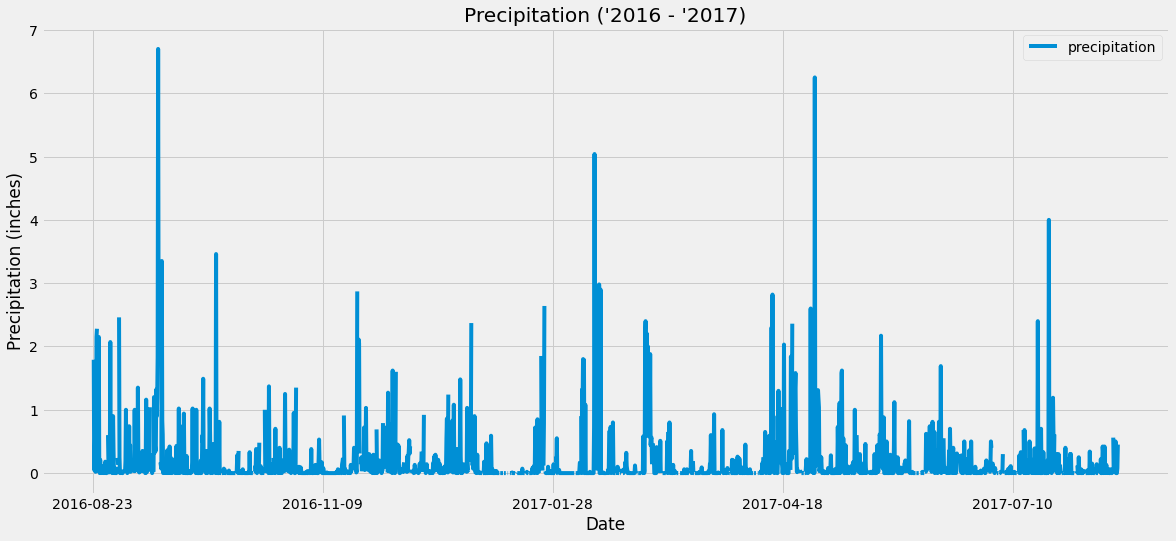

In [19]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize = (18, 8))
precipitation_df.plot(ax = ax, x_compat = True)

# Format the plot to generate the title and x - y axis.
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation (inches)')
ax.set_title("Precipitation ('2016 - '2017)")

# Save plot to folder named "Images" and display the plot
plt.savefig("Images/precipitation.png")
plt.show()

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

In [21]:
# Design a query to show how many stations are available in this dataset?
number_stations = session.query(Station.id).distinct().count()
number_stations

9

In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_rows = session.query(Station.station, func.count(Measurement.id))\
                      .select_from(Measurement)\
                      .join(Station, Measurement.station == Station.station)\
                      .group_by(Station.station)\
                      .order_by(func.count(Measurement.id).desc()).all()

for result in station_rows:
    print(f"{result[0]}\tCount: {result[1]}")

USC00519281	Count: 2772
USC00519397	Count: 2724
USC00513117	Count: 2709
USC00519523	Count: 2669
USC00516128	Count: 2612
USC00514830	Count: 2202
USC00511918	Count: 1979
USC00517948	Count: 1372
USC00518838	Count: 511


In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active = 'USC00519281'
most_active_temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
                           .filter(Measurement.station == most_active).all()
print(f"Lowest Temperature for station 'USC00519281' : {most_active_temps[0][0]} Fahrenheit, Highest Temperature: {most_active_temps[0][1]} Fahrenheit, Average Temperature: {round(most_active_temps[0][2], 2)} Fahrenheit  ")

Lowest Temperature for station 'USC00519281' : 54.0 Fahrenheit, Highest Temperature: 85.0 Fahrenheit, Average Temperature: 71.66 Fahrenheit  


In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
yearly_temp = session.query(Measurement.tobs).filter(Measurement.station == most_active)\
                     .filter(Measurement.date >= (one_year_ago)).all()
yearly_tempdf = pd.DataFrame(yearly_temp,columns = ['temperature'])
yearly_tempdf.head(10)

,temperature
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
5,73.0
6,78.0
7,77.0
8,78.0
9,80.0


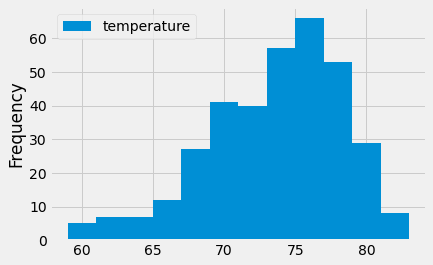

In [25]:
# Create Histogram
yearly_tempdf.plot.hist(bins = 12)
 # labels
ax.set_xlabel('Temperature (Farenheight)')
ax.set_title('One Year Temperature Distribution for USC00519281 ')
plt.savefig("Images/station-histogram.png")
plt.show()


## Bonus: Other Recomended Analysis

## Temperature Analysis I

* Hawaii is reputed to enjoy mild weather all year. Is there a meaningful difference between the temperature in, for example, June and December?

* You may either use SQLAlchemy or pandas's `read_csv()` to perform this portion.

* Identify the average temperature in June at all stations across all available years in the dataset. Do the same for December temperature.

* Use the t-test to determine whether the difference in the means, if any, is statistically significant. Will you use a paired t-test, or an unpaired t-test? Why?

In [26]:
## Identify the average temperature in June at all stations across all available years in the dataset. Do the same for December temperature.


# Retrieve the month of June and December

month_june = session.query(Measurement.date, Measurement.tobs).filter(func.strftime("%m",Measurement.date) == '06').all()
month_december = session.query(Measurement.date, Measurement.tobs).filter(func.strftime("%m",Measurement.date) == '12').all()

# Convert the data to DataFrames

month_june_df = pd.DataFrame(month_june,columns=["Date","Temperature"])
month_december_df = pd.DataFrame(month_december,columns=["Date","Temperature"])

month_june_df["Month"] = "June"
month_december_df["Month"] = "December"

# Concatenate the Dataframes

temperature_df = pd.concat([month_june_df, month_december_df], ignore_index=True)


# Group the dataframes to find the average temperature for both June and December
avg_temp = temperature_df.groupby("Month").mean()
avg_temp

,Temperature
Month,
December,71.041529
June,74.944118


Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)

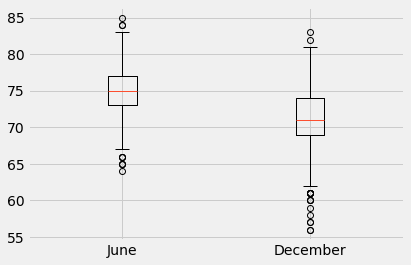

In [27]:
# Use the t-test to determine whether the difference in the means, if any, is statistically significant. Will you use a paired t-test, or an unpaired t-test? Why?
# Since we are comparing the mean from two separate groups, we will consider using the unpaired t-test.
box_plot = [month_june_df["Temperature"],month_december_df["Temperature"]]
plt.boxplot(box_plot,labels=['June', 'December']);
stats.ttest_ind(month_june_df["Temperature"], month_december_df["Temperature"])


### *The p-value < 0.05. We can conclude that the difference in means is statistically significant. 
### *The difference in temperature between the months of  June and December is considerable.

## Temperature Analysis II

In [28]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [29]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_temps = calc_temps('2017-02-06', '2017-02-16')

print(f"Lowest Temperature: {trip_temps[0][0]} Fahrenheit, Average Temperature: {round(trip_temps[0][1], 2)} Fahrenheit, Highest Temperature: {trip_temps[0][2]} Fahrenheit")

Lowest Temperature: 59.0 Fahrenheit, Average Temperature: 70.42 Fahrenheit, Highest Temperature: 80.0 Fahrenheit


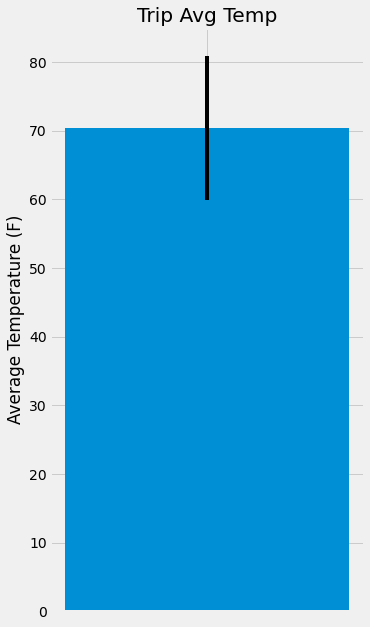

In [31]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
peak_to_peak = trip_temps[0][2] - trip_temps[0][0]
average_temperature = trip_temps[0][1]

# plot chart
fig, ax = plt.subplots(figsize = (5, 10))

ax.bar(1, average_temperature, yerr = peak_to_peak/2, width = 0.5)

#setting the labels
ax.set_xticks([1])
ax.set_xticklabels([""])
ax.set_title('Trip Avg Temp')
ax.set_ylabel('Average Temperature (F)')

#save fig
plt.savefig("Images/temperature.png")

#show figure

plt.show()

## Daily Rainfall Average

* Calculate the rainfall per weather station using the previous year's matching dates.

* Calculate the daily normals. Normals are the averages for the min, avg, and max temperatures.

* You are provided with a function called `daily_normals` that will calculate the daily normals for a specific date. This date string will be in the format `%m-%d`. Be sure to use all historic TOBS that match that date string.

* Create a list of dates for your trip in the format `%m-%d`. Use the `daily_normals` function to calculate the normals for each date string and append the results to a list.

* Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.

* Use Pandas to plot an area plot (`stacked=False`) for the daily normals.

* ![daily-normals](Images/daily-normals.png)


In [32]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
start_date = '2017-04-02'
end_date = '2017-04-09'

s = session.query(Station.station,
                  func.sum(Measurement.prcp),
                  Station.name,
                  Station.elevation,                                    
                  Station.latitude,
                  Station.longitude)\
.filter(Measurement.station == Station.station)\
.filter(Measurement.date >= start_date)\
.filter(Measurement.date <= end_date)\
.group_by(Station.station)\
.order_by(func.sum(Measurement.prcp).desc())

for row in s:
    rain="{0:.2f}".format(row[1])
    print (f"Station:  {row[0]}\n    Rainfall:  {rain}  \n    Location:  {row[2]}\n    Elevation:  {row[3]}  \
    Latitude:  {row[4]}  Longitude:  {row[5]}")
    print()

Station:  USC00516128
    Rainfall:  0.70  
    Location:  MANOA LYON ARBO 785.2, HI US
    Elevation:  152.4      Latitude:  21.3331  Longitude:  -157.8025

Station:  USC00519281
    Rainfall:  0.51  
    Location:  WAIHEE 837.5, HI US
    Elevation:  32.9      Latitude:  21.45167  Longitude:  -157.84888999999998

Station:  USC00514830
    Rainfall:  0.16  
    Location:  KUALOA RANCH HEADQUARTERS 886.9, HI US
    Elevation:  7.0      Latitude:  21.5213  Longitude:  -157.8374

Station:  USC00513117
    Rainfall:  0.16  
    Location:  KANEOHE 838.1, HI US
    Elevation:  14.6      Latitude:  21.4234  Longitude:  -157.8015

Station:  USC00519523
    Rainfall:  0.00  
    Location:  WAIMANALO EXPERIMENTAL FARM, HI US
    Elevation:  19.5      Latitude:  21.33556  Longitude:  -157.71139

Station:  USC00519397
    Rainfall:  0.00  
    Location:  WAIKIKI 717.2, HI US
    Elevation:  3.0      Latitude:  21.2716  Longitude:  -157.8168

Station:  USC00517948
    Rainfall:  0.00  
    Locatio

In [33]:
# Alternatively,

# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

sta_yearly_prec= session.query(Station.station, Station.name, Station.latitude, Station.longitude,
                               Station.elevation, func.avg(Measurement.prcp)).\
    filter(Measurement.station == Station.station).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) >= dt.date(2016, 8, 23)).group_by(Station.station).\
    order_by(func.avg(Measurement.prcp).desc()).all()

#load into a dataframe
syc_df = pd.DataFrame(sta_yearly_prec, columns = ['Station', 'Name', 'Latitude', 'Longitude', 
        'Elevation', 'Avg. Precipitation (in.)'])


#syc_df


In [34]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

* Calculate the daily normals for your trip

* Push each tuple of calculations into a list called `normals`

* Set the start and end date of the trip

* Use the start and end date to create a range of dates

* Stip off the year and save a list of %m-%d strings

* Loop through the list of %m-%d strings and calculate the normals for each date


In [35]:
# Create a list of dates for your trip in the format `%m-%d`. Use the `daily_normals` function to calculate the normals for each date string and append the results to a list.

# Set the start and end date for the trip
start_date = "2017-04-08"
end_date = "2017-04-19"

# Trip Duration
trip_start = int(start_date[-2:])
trip_end = int(end_date[-2:])
trip_duration = trip_end - trip_start + 1

# Set Start date as datetime object

start_date = dt.datetime.strptime(start_date, '%Y-%m-%d')

# List dates (MM-DD) of trip

list_dates = [dt.datetime.strftime(start_date + dt.timedelta(days = x), '%m-%d') 
            for x in range(0, trip_duration)]

# Calculate normals for each date
normals = [daily_normals(date) for date in list_dates]

normals

[[(66.0, 72.10526315789474, 77.0)],
 [(62.0, 71.6140350877193, 78.0)],
 [(64.0, 71.40350877192982, 79.0)],
 [(65.0, 72.49180327868852, 82.0)],
 [(65.0, 72.22413793103448, 80.0)],
 [(64.0, 71.52542372881356, 79.0)],
 [(65.0, 72.75, 81.0)],
 [(61.0, 71.79310344827586, 79.0)],
 [(62.0, 71.55357142857143, 81.0)],
 [(65.0, 71.93103448275862, 77.0)],
 [(67.0, 72.49152542372882, 77.0)],
 [(65.0, 72.42105263157895, 83.0)]]

In [36]:
# Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

# 1. Extract normals into a list of lists
normals = [np.array(normal[0]) for normal in normals]

#convert normals list into a data frame
normals_df = pd.DataFrame(normals)

# Add date column
normals_df["Date"] = list_dates

# Set index and rename columns
normals_df = normals_df.set_index("Date")
normals_df = normals_df.rename(columns={0: "Min Temp", 1: "Avg Temp", 2: "Max Temp"})
normals_df


,Min Temp,Avg Temp,Max Temp
Date,,,
04-08,66.0,72.105263,77.0
04-09,62.0,71.614035,78.0
04-10,64.0,71.403509,79.0
04-11,65.0,72.491803,82.0
04-12,65.0,72.224138,80.0
04-13,64.0,71.525424,79.0
04-14,65.0,72.750000,81.0
04-15,61.0,71.793103,79.0
04-16,62.0,71.553571,81.0


<Figure size 432x288 with 0 Axes>

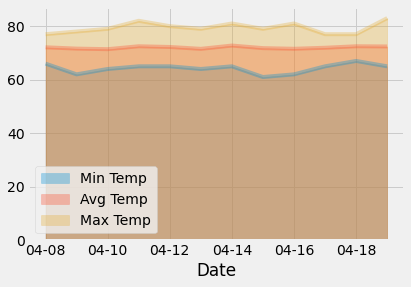

In [37]:
# Use Pandas to plot an area plot (`stacked=False`) for the daily normals.
# # Plot the daily normals as an area plot with `stacked=False`
# Generate the Plot with Pandas
plt.savefig("Images/daily-normals.png")
normals_df.plot.area(stacked=False, alpha=.333)